N: 77, median: 2.66, mean: 2.69
Q1: 2.5164234675345, Q3: 2.808950169904008, Q3-Q1: 0.29252670236950795
Min: 2.084705674536432, Max: 3.595335023056703


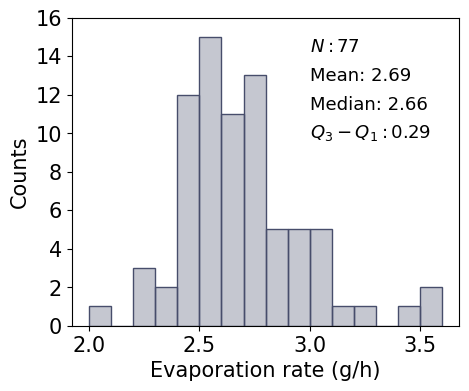

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

save_option = True
figsavepath = "../Figures/FigureS6_evap-rate.svg"

path = "../Data/01_SUMMARY.xlsx"
df = pd.read_excel(path)
Y = df['Evap'].to_list()

# remove failed data
False_check = df['FALSE'].to_list()
False_indices = [i for i, x in enumerate(False_check) if x == 1]
for index in sorted(False_indices, reverse=True):
    del Y[index]

# remove nan
nan_indices = [i for i, x in enumerate(Y) if isinstance(x, float) and math.isnan(x)]
for index in sorted(nan_indices, reverse=True):
    del Y[index] 

### Plot ###
plt.rcParams["font.size"] = 15
fig = plt.figure(figsize=(5,4))
color = "#474D6B" # blue gray

bin_width = 0.1
bin_edges = np.arange(start=2, stop=3.6 + bin_width, step=bin_width)
plt.hist(Y,color=f"{color}50", ec=color, bins = bin_edges)
plt.xlabel('Evaporation rate (g/h)')
plt.ylabel('Counts')
plt.yticks(np.arange(0,18,2))
plt.text(3, 14, '$\it{N}: 77$', ha='left', va='bottom',color="black",fontsize=13)
plt.text(3, 12.5, 'Mean: 2.69', ha='left', va='bottom',color="black",fontsize=13)
plt.text(3, 11, 'Median: 2.66', ha='left', va='bottom',color="black",fontsize=13)
plt.text(3, 9.5, '$\it{Q}_{3}-\it{Q}_{1}: 0.29$', ha='left', va='bottom',color="black",fontsize=13)

print(f'N: {len(Y)}, median: {np.median(Y):.2f}, mean: {np.mean(Y):.2f}')
print(f'Q1: {np.percentile(Y, 25)}, Q3: {np.percentile(Y, 75)}, Q3-Q1: {np.percentile(Y, 75)-np.percentile(Y, 25)}')
print(f'Min: {min(Y)}, Max: {max(Y)}')
if save_option:
    plt.savefig(figsavepath, dpi=1200, bbox_inches='tight')